In [1]:
from pickle import load,dump
from time import time
from tqdm import tqdm,trange
from algorithms.dijkstra import dijkstra, dijkstra1
from algorithms.ch import Contraction_Hierarchies
from algorithms.bidij import BiDij
from algorithms.astar import AStar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = 'test3'

with open(f'./testcases/{test}/edges.pickle','rb') as f:
    edges   = load(f)

with open(f'./testcases/{test}/coords.pickle','rb') as f:
    coords  = load(f)

with open(f'./testcases/{test}/queries.pickle','rb') as f:
    queries = load(f)

m = len(edges)
n = len(coords)
q = len(queries)

In [3]:
adj_bi  = [[[] for _ in range(n)], [[] for _ in range(n)]]
cost_bi = [[[] for _ in range(n)], [[] for _ in range(n)]]
adj = [[] for _ in range(n)]
cost = [[] for _ in range(n)]
for e in edges:
    u,v,c = e[0],e[1],e[2]
    adj_bi[0][u-1].append(v-1)
    cost_bi[0][u-1].append(c)
    adj_bi[1][v-1].append(u-1)
    cost_bi[1][v-1].append(c)
    adj[u-1].append(v-1)
    cost[u-1].append(c)
    
x = [c[0] for c in coords]
y = [c[1] for c in coords]

## Dijkstra

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [19:11<00:00,  1.15s/it]


Dijkstra: 1151.855808019638


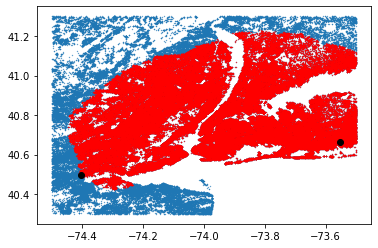

In [4]:
t1 = time()
with open('./outputs/output_dijkstra.txt','w') as f:
    for i in trange(q):
        u,v = queries[i][0],queries[i][1]
        if i == 0:
            f.write(f'{dijkstra1(adj, cost, u-1, v-1,x,y)}\n')
        f.write(f'{dijkstra(adj, cost, u-1, v-1)}\n')
t2 = time()

print(f"Dijkstra: {t2-t1}")

## Bidirectional Dijkstra

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:54<00:00,  3.39it/s]


Bidirectional Dijkstra: 294.56409311294556


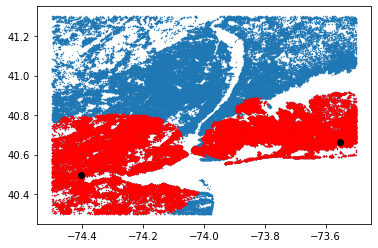

In [5]:
bidij = BiDij(n,x,y)
bidij.define_values(adj_bi, cost_bi)
t1 = time()
with open('./outputs/output_bidij.txt','w') as f:
    for i in tqdm(range(q)):
        u,v = queries[i][0],queries[i][1]
        if i == 0:
            f.write(f'{bidij.query1(adj_bi, cost_bi, u-1, v-1)}\n')
            continue
        f.write(f'{bidij.query(adj_bi, cost_bi, u-1, v-1)}\n')
t2 = time()
print(f"Bidirectional Dijkstra: {t2-t1}")

## A* Algorithm

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:34<00:00,  6.48it/s]


A*: 154.3322422504425


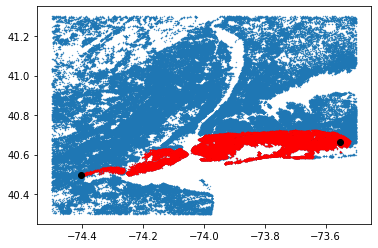

In [6]:
astar = AStar(n, adj, cost, x, y)
t1 = time()
with open('./outputs/output_astar.txt','w') as f:
    for i in trange(q):
        u,v = queries[i][0],queries[i][1]
        if i == 0:
            f.write(f"{astar.query1(u-1, v-1)}\n")
            continue
        else:
            f.write(f"{astar.query(u-1, v-1)}\n")
t2 = time()
print(f"A*: {t2-t1}")

## Contraction Hierarchies

In [7]:
ch = Contraction_Hierarchies(n, adj_bi, cost_bi)

#### Preprocessing

In [8]:
t1 = time()
ch.process_graph()
print('Ready!\n')
t2 = time()
print(f"CH-preprocess: {t2-t1}")
with open('./ch_weights/rank_ch.pickle','wb') as f:
    dump(ch.rank,f)
with open('./ch_weights/cost_ch.pickle','wb') as f:
    dump(ch.cost,f)
with open('./ch_weights/adj_ch.pickle','wb')  as f:
    dump(ch.adj,f)

100%|██████████████████████████████████████████████████████████████████████████████| 239595/264346 [2:49:13<00:00,  36.4s/it]

#### Pretrained Weights

In [ ]:
# with open('./ch_weights/rank_ch.pickle','rb') as f1, open('./ch_weights/cost_ch.pickle','rb') as f2, open('./ch_weights/adj_ch.pickle','rb') as f3:
#     rank_ch = load(f1)
#     cost_ch = load(f2)
#     adj_ch  = load(f3)
 #ch.pretrained(rank_ch, cost_ch, adj_ch)

#### Querying

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.35it/s]


CH-query: 14.028992176055908


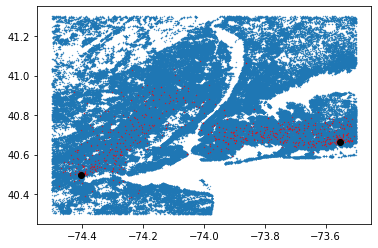

In [9]:
t3 = time()
with open('./outputs/output_ch.txt','w') as f:
    for i in trange(q):
        u,v = queries[i][0],queries[i][1]
        if i == 0:
            f.write(f"{ch.query1(u-1, v-1, x, y)}\n")
        else:
            f.write(f'{ch.query(u-1, v-1)}\n')
t4 = time()
print(f"CH-query: {t4-t3}")